In [81]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
#from naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error,r2_score,roc_auc_score,roc_curve
from sklearn import metrics
%matplotlib inline

In [3]:
df=pd.read_excel('Bank_Personal_loan_MOdelling.xlsx',sheet_name='Data')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop('ID',inplace=True ,axis=1)

In [8]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.apply(lambda x :len(x.unique()))

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Data Cleaning

In [11]:
#where experience are in negative values
df[df['Experience']<0]['Experience'].count()

52

In [12]:
df.corr()['Experience']

Age                   0.994215
Experience            1.000000
Income               -0.046574
ZIP Code             -0.028626
Family               -0.052563
CCAvg                -0.050089
Education             0.013152
Mortgage             -0.010582
Personal Loan        -0.007413
Securities Account   -0.001232
CD Account            0.010353
Online                0.013898
CreditCard            0.008967
Name: Experience, dtype: float64

Exp. has positive corr with age column

In [15]:
df[df["Experience"]<0]["Experience"].count()

0

In [36]:
df["Experience"]=df["Experience"].abs()

In [40]:
df['CCAvg']=df['CCAvg'].astype(float)*12

In [16]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [17]:
#outliers
numerical =["Age","Income","Experience","CCAvg","Mortgage"]
Q1 = df[numerical].quantile(0.25)
Q3=df[numerical].quantile(0.75)
IQR = Q3-Q1
out = (df[numerical]<(Q1))
out = (df[numerical]<(Q1-1.5*IQR))|(df[numerical]>(Q3 + 1.5 *IQR))
out.sum()

Age             0
Income         96
Experience      0
CCAvg         324
Mortgage      291
dtype: int64

In [18]:
#sns.boxplot(x=df['Income'])
#sns.boxplot(x=df['CCAvg'])
#sns.boxplot(x=df['Mortrage'])

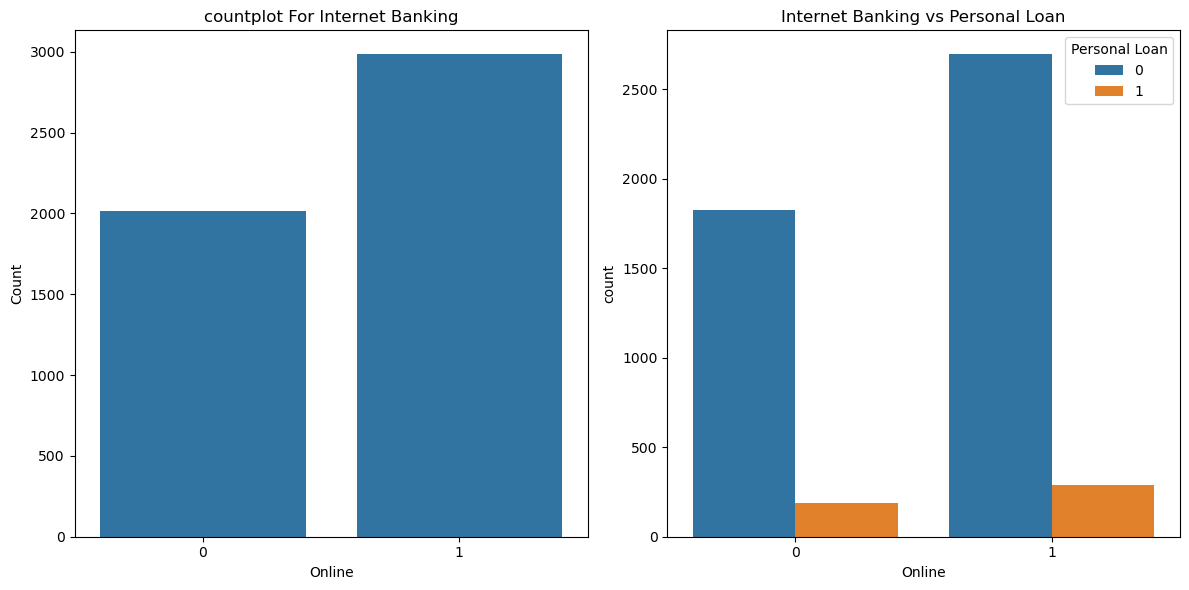

In [19]:
fig ,axes =plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x='Online',hue='Personal Loan',data=df,ax=axes[1])
axes[1].set_title('Internet Banking vs Personal Loan')
axes[1].legend(title='Personal Loan',loc='upper right')

sns.countplot(x='Online',data=df,ax=axes[0])
axes[0].set_title('countplot For Internet Banking')
axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [20]:
#pip install ydata_profiling

In [21]:
from ydata_profiling import ProfileReport

In [22]:
profile=ProfileReport(df)

In [27]:
profile.to_notebook_iframe()
#use .to_file('report.html')

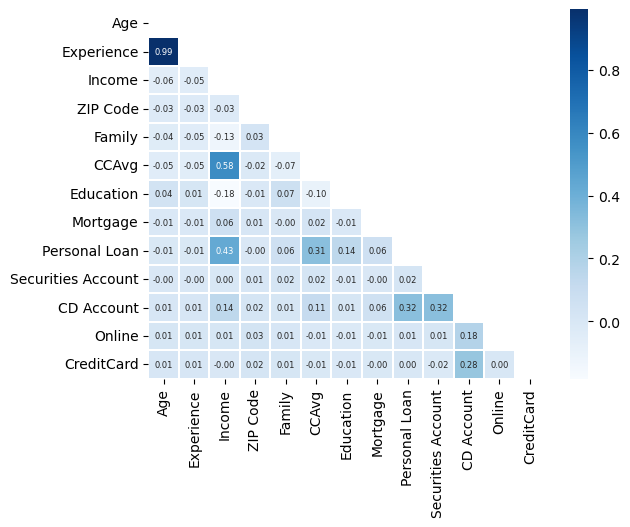

In [25]:
corr=df.corr(method='spearman')
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True,cmap='Blues',fmt='.2f',linewidths=0.2,annot_kws={'size':6})
plt.show()

#Refer maam shared file loan-modelling

In [ ]:
Seperatinmg target column 

In [30]:
y=df['Personal Loan']
x=df.drop('Personal Loan',axis=1)
y.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [ ]:
DATA IS INBALANCED

In [ ]:
100 rows: 90(0):10(1)(Stratified sampling )
70 (0)       30(1)
70           30
65: 0        25:0
5:1          5:1

In [ ]:
y.value_counts(normalize=True)*100

In [42]:
#x.drop('ID',axis=1,inplace=True)

In [34]:
x.drop('ZIP Code',axis=1,inplace=True)

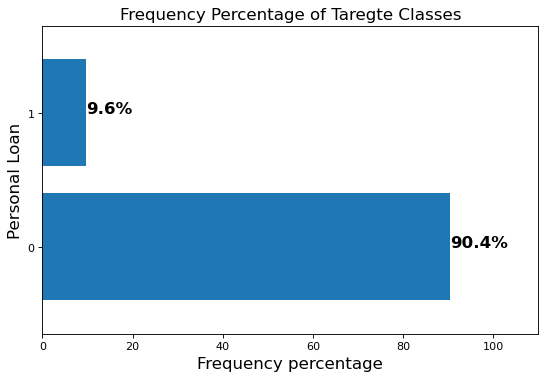

In [44]:
plt.figure(dpi=80)

df['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh',width=0.8,figsize=(8,5))
labels=df['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i],i,str(labels[i])+'%',fontsize=15,weight='bold')

plt.xlim([0,110])
plt.xlabel('Frequency percentage',fontsize=15)
plt.ylabel('Personal Loan',fontsize=15)
plt.title('Frequency Percentage of Taregte Classes',fontsize=15)
plt.show()

# Splitting The data 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0,stratify=y)

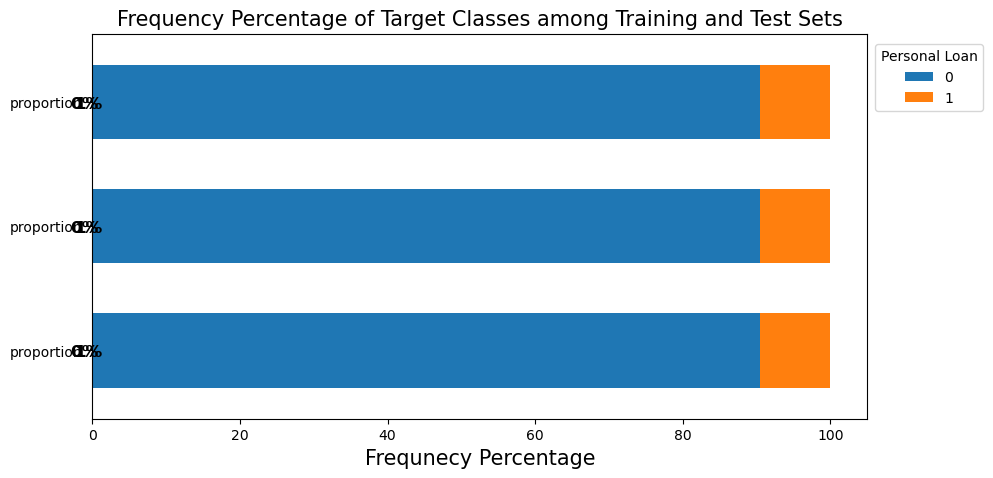

In [55]:
df_perc=pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                   y_train.value_counts(normalize=True).mul(100).round(1),
                   y_test.value_counts(normalize=True).mul(100).round(1)],axis=1)
df_perc=df_perc.T
df_perc.plot(kind='barh',stacked=True,figsize=(10,5),width=0.6)

for idx,val in enumerate([*df_perc.index.values]):
    for(percentage,y_location) in zip(df_perc.loc[val],df_perc.loc[val].cumsum()):
        plt.text(x=(y_location-percentage)+(percentage/2)-3,
                 y=idx-0.05,s=f'{percentage}%',
                 color='black',fontsize=12,fontweight='bold')

plt.legend(title='Personal Loan',loc=(1.01,0.8))
plt.xlabel('Frequnecy Percentage',fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets',fontsize=15)
plt.show()


In [ ]:
# scaling the features

In [89]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [93]:
ada=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),n_estimators=10, learning_rate=0.5)
ada.fit(X_train_scaled,y_train)
ada_pred=ada.predict(X_test_scaled)
ada_training=ada.score(X_train_scaled,y_train) 
ada_testing=ada.score(X_test_scaled,y_test )
ada_f1=f1_score(y_test,ada_pred)
ada_precision=precision_score(y_test,ada_pred)
print("Traing Accuracy:",ada_training)
print("Testing Accuracy",ada_testing)
print("F1 Score:", ada_f1)
print("AdaBoost Classifier Confusion matrix :\n\n",confusion_matrix(y_test,ada_pred))

Traing Accuracy: 0.9865714285714285
Testing Accuracy 0.986
F1 Score: 0.9247311827956989
AdaBoost Classifier Confusion matrix :

 [[1350    6]
 [  15  129]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [99]:
gbc=GradientBoostingClassifier(n_estimators=65, learning_rate=0.02)
gbc.fit(X_train_scaled,y_train)
gbc_pred=gbc.predict(X_test_scaled)
gbc_training=gbc.score(X_train_scaled,y_train) 
gbc_testing=gbc.score(X_test_scaled,y_test )
gbc_f1=f1_score(y_test,gbc_pred)
gbc_precision=precision_score(y_test,gbc_pred)
print("Traing Accuracy:",gbc_training)
print("Testing Accuracy",gbc_testing)
print("F1 Score:", gbc_f1)
print("GradientBoost Classifier Confusion matrix :\n\n",confusion_matrix(y_test,gbc_pred))

Traing Accuracy: 0.9808571428571429
Testing Accuracy 0.9813333333333333
F1 Score: 0.8947368421052632
GradientBoost Classifier Confusion matrix :

 [[1353    3]
 [  25  119]]
